## Описание данных
- ad_id – идентификатор объявления (рекламы)
- xyz_campaign_id – идентификатор рекламной кампании в базе компании X
- fb_campaign_id – идентификатор кампании в Facebook
- age – возрастная группа, которой показывалась реклама
- gender – пол тех, кому показывалась реклама
- interest –код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес, условно: 1 – животные, 2 – автомобили, 3 – тортики и т.д.)
- impressions – число показов
- clicks – число кликов
- spent – сумма, которую компания потратила на показ объявления 
- total_conversion – количество людей, которые заинтересовались продуктом после просмотра рекламы
- approved_conversion – количество людей, которые купили продукт после просмотра рекламы

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
df = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/Kl4mPINblwnJCA')
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


## Сколько уникальных рекламных кампаний было проведено? 

In [7]:
df.xyz_campaign_id.nunique()

3

## Типы переменных:
- total_conversion - дискретная
- approved_conversion - дискретная
- gender - номинативная
- clicks - дискретная
- interest - номинотивная
- spent - непрерывная
- impressions - дискретная
- age - ранговая

## Постройте график распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление) для каждой рекламной кампании в Facebook, прологарифмировав значения. Выберите верные утверждения:

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


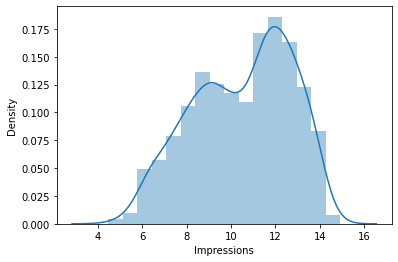

In [8]:
sns.distplot(np.log(df.Impressions))

In [ ]:
# распределение бимодальное, ненормальное

## Теперь посчитаем ещё несколько полезных метрик. Первая – CTR (click-through rate), которая показывает кликабельность, т.е. отношение числа кликов к количеству показов.

Создайте новую колонку, затем посмотрите на описательные статистики. В качестве ответа укажите ad_id объявления с наибольшим CTR.

In [33]:
df['ctr'] = df['Clicks'] / df['Impressions']

In [39]:
df['ctr'].describe()

count    1143.000000
mean        0.000164
std         0.000115
min         0.000000
25%         0.000100
50%         0.000160
75%         0.000234
max         0.001059
Name: ctr, dtype: float64

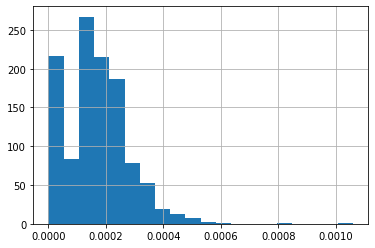

In [41]:
df['ctr'].hist(bins=20)

In [18]:
df[['ad_id', 'ctr']].sort_values('ctr', ascending=False).head(1)

,ad_id,ctr
150,738637,0.001059


In [23]:
# через iloc
df.iloc[df.ctr.idxmax()]

ad_id                      738637
xyz_campaign_id               936
fb_campaign_id             109857
age                         45-49
gender                          F
interest                       24
Impressions                   944
Clicks                          1
Spent                        1.42
Total_Conversion                1
Approved_Conversion             0
ctr                    0.00105932
Name: 150, dtype: object

## Визуализируйте CTR с разбивкой по номеру рекламной кампании (xyz_campaign_id). 

In [35]:
df.xyz_campaign_id.unique()

array([ 916,  936, 1178])

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

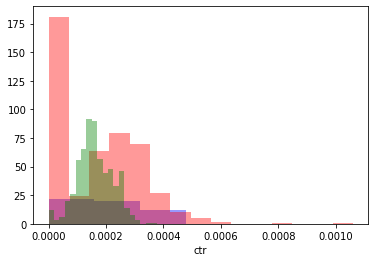

In [42]:
sns.distplot(df.query('xyz_campaign_id == 916').ctr, kde=False, color='blue')
sns.distplot(df.query('xyz_campaign_id == 936').ctr, kde=False, color='red')
sns.distplot(df.query('xyz_campaign_id == 1178').ctr, kde=False, color='green')

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


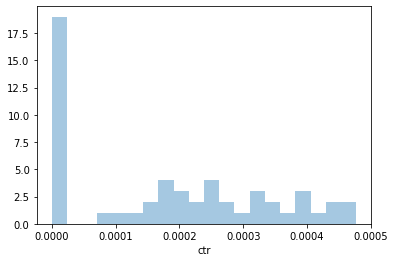

In [38]:
sns.distplot(df.query('xyz_campaign_id == 916').ctr, kde=False, bins=20)

## CPC (cost-per-click) – стоимость за клик пользователя по объявлению. Рассчитывается путём деления суммы потраченных денег на общее число кликов

Выведите описательные статистики для новой переменной, посмотрите на форму распределения. В ответе укажите межквартильный размах, округленный до двух знаков после точки.

Обратите внимание, что в столбце могут встретиться NaN. Если вы используете функцию iqr из scipy, то следует указать аргумент nan_policy='omit', чтобы их проигнорировать. При построении графика необходимо использовать метод .dropna().

In [49]:
df['cpc'] = df['Spent'] / df['Clicks']

In [50]:
df['cpc'].describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: cpc, dtype: float64

In [51]:
# межвартильный размах
round(df['cpc'].quantile(q=0.75) - df['cpc'].quantile(q=0.25), 2)

0.25

In [56]:
import scipy.stats as ss
ss.iqr(df['cpc'], nan_policy='omit')

0.25436369905

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


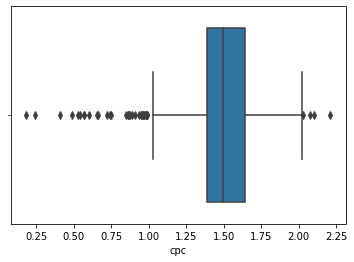

In [53]:
sns.boxplot(df['cpc'].dropna())

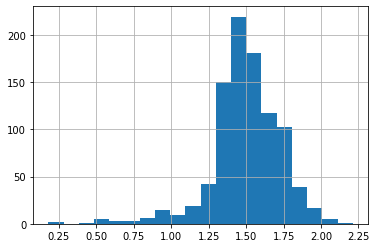

In [55]:
df['cpc'].hist(bins=20)

## Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. 

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


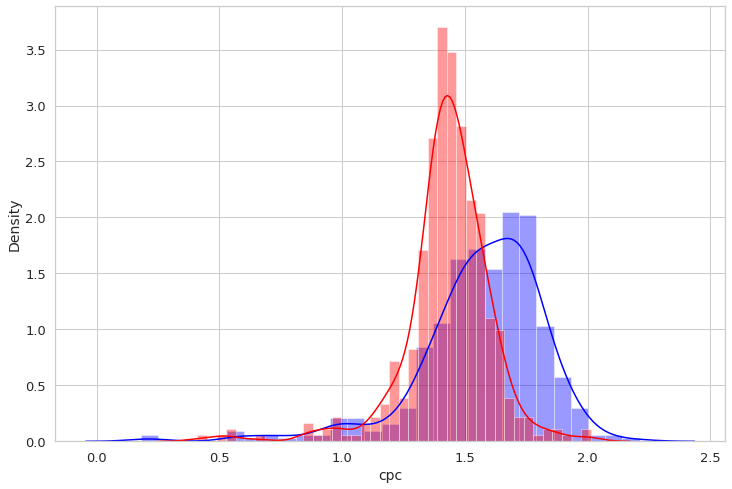

In [62]:
sns.set(
    rc={
        "figure.figsize": (12, 8), #размер графика - 12 дюймов в ширину, 8 в длину
        "axes.titlesize": 20, #размер заголовка 
        "axes.labelsize": 14, #размер подписей осей
        "xtick.labelsize": 13, #размер подписей чёрточек на x-оси
        "ytick.labelsize": 13, #размер подписей чёрточек на y-оси
    }
)

sns.set_style("whitegrid") #тема фона, белая со штриховкой
sns.distplot(df.query('gender == "M"').cpc.dropna(), color='blue')
sns.distplot(df.query('gender == "F"').cpc.dropna(), color='red')

## Конверсия (conversion rate) – отношение числа пользователей, совершивших целевое действие на определенном этапе, к общему числу тех, кто дошел до данного этапа.

Посчитайте конверсию из клика в покупку. В качестве ответа укажите конверсию для объявления 1121814 в процентах, округлив значение до 2 знаков после точки. Например, если значение кликов равно 10, а покупок – 2, то CR на данном этапе составляет 2/10=0.2=20.

Note: клики – Clicks, покупки – Approved_Conversion.

In [97]:
df['cr'] = round(df['Approved_Conversion'] / df['Clicks'], 5).mul(100)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


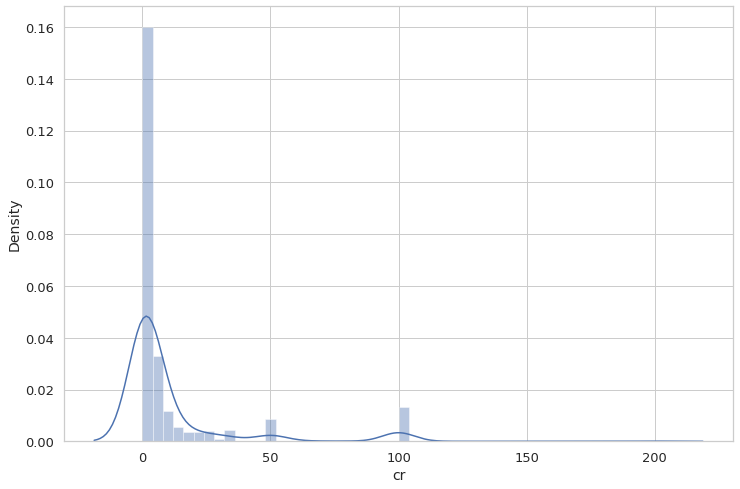

In [93]:
df.replace(np.inf, np.nan, inplace=True)
sns.distplot(df['cr'].dropna())

In [98]:
df.query('ad_id == 1121814')['cr'].reset_index()

,index,cr
0,860,3.088
